In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/train.csv')

In [ ]:
df.describe()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000,333.000000
mean,250.951952,3.360341,10.689189,11.293483,0.060060,0.557144,6.265619,68.226426,3.709934,9.633634,409.279279,18.448048,359.466096,12.515435,22.768769
std,147.859438,7.352272,22.674762,6.998123,0.237956,0.114955,0.703952,28.133344,1.981123,8.742174,170.841988,2.151821,86.584567,7.067781,9.173468
min,1.000000,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,6.000000,1.129600,1.000000,188.000000,12.600000,3.500000,1.730000,5.000000
25%,123.000000,0.078960,0.000000,5.130000,0.000000,0.453000,5.884000,45.400000,2.122400,4.000000,279.000000,17.400000,376.730000,7.180000,17.400000
50%,244.000000,0.261690,0.000000,9.900000,0.000000,0.538000,6.202000,76.700000,3.092300,5.000000,330.000000,19.000000,392.050000,10.970000,21.600000
75%,377.000000,3.678220,12.500000,18.100000,0.000000,0.631000,6.595000,93.800000,5.116700,24.000000,666.000000,20.200000,396.240000,16.420000,25.000000
max,506.000000,73.534100,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,21.200000,396.900000,37.970000,50.000000


In [ ]:
df.columns

Index(['ID', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad',
       'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')

In [ ]:
for i in df.columns:
  print(i, len(df[df[i].isnull() == True]))

ID 0
crim 0
zn 0
indus 0
chas 0
nox 0
rm 0
age 0
dis 0
rad 0
tax 0
ptratio 0
black 0
lstat 0
medv 0


In [ ]:
df['crim']

,crim
0,0.00632
1,0.02731
2,0.03237
3,0.06905
4,0.08829
...,...
328,0.17783
329,0.06263
330,0.04527
331,0.06076


In [ ]:
df['medv']

,medv
0,24.0
1,21.6
2,33.4
3,36.2
4,22.9
...,...
328,17.5
329,22.4
330,20.6
331,23.9


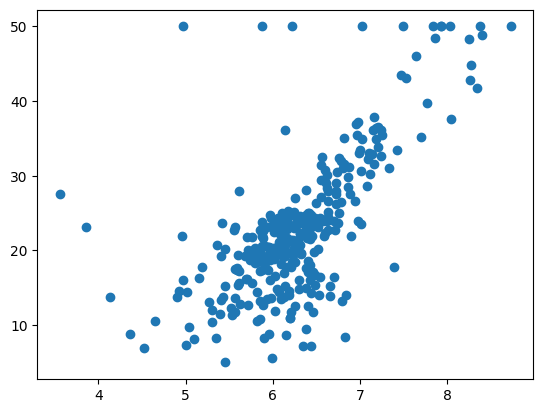

In [ ]:
plt.scatter(x = df['rm'], y = df[['medv']])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df[['rm']], df[['medv']], test_size=0.3, random_state=2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test).reshape(-1,1)
r2s = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)**0.5
mae = mean_absolute_error(y_test, y_pred)
print("mse is :", mse)
print("mae is :", mae)
print("r2 score is :", r2s)

mse is : 6.770704403893554
mae is : 4.738936119695065
r2 score is : 0.5541821179966644


In [ ]:
X_train, y_train

(        rm
 182  6.240
 54   6.727
 4    6.012
 304  5.759
 192  6.230
 ..     ...
 299  6.701
 22   6.595
 72   6.127
 15   6.142
 168  6.108
 
 [233 rows x 1 columns],
      medv
 182  25.2
 54   28.0
 4    22.9
 304  19.9
 192  20.1
 ..    ...
 299  16.4
 22   30.8
 72   20.4
 15   15.2
 168  24.3
 
 [233 rows x 1 columns])

In [ ]:
df['medv'].mean()

22.76876876876877

In [ ]:
X = df.drop(columns=['ID', 'medv'], errors='ignore')  # Drop ID and target variable
y = df['medv']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2)

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

r2s = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)**0.5
mae = mean_absolute_error(y_test, y_pred)

print("MSE:", mse)
print("MAE:", mae)
print("R² Score:", r2s)


MSE: 4.806514051332927
MAE: 3.675378210383451
R² Score: 0.775327349211183


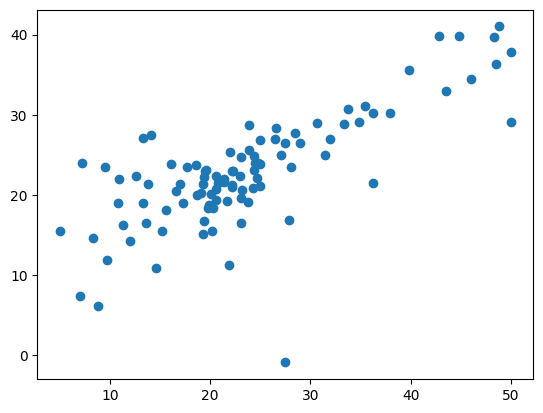

In [ ]:
plt.scatter(y_test, y_pred)

# Linear Regression — Theory and Viva Q&A

## 1. Linear Regression: Univariate and Multivariate

Linear Regression is a supervised machine learning algorithm used to predict a continuous dependent variable based on one or more independent variables.

| Type | Description | Example |
|------|-------------|---------|
| **Univariate Linear Regression** | Regression with one independent variable. | Predict salary using years of experience. |
| **Multivariate Linear Regression** | Regression with multiple independent variables. | Predict house price using size, location, number of bedrooms. |

### Equations

- **Univariate Linear Regression:**  
  y = b₀ + b₁x

- **Multivariate Linear Regression:**  
  y = b₀ + b₁x₁ + b₂x₂ + ... + bₙxₙ

## 2. Least Squares Method for Linear Regression

The Least Squares Method is a standard approach to find the best-fitting line by minimizing the sum of squared errors between the actual and predicted values.

### Objective Function

Minimize  Σ (yᵢ - ŷᵢ)²

Where:  
- yᵢ = actual value  
- ŷᵢ = predicted value

## 3. Measuring Performance of Linear Regression

| Metric | Description |
|--------|-------------|
| **R² Score** | Proportion of variance in the dependent variable explained by the model. |
| **Mean Absolute Error (MAE)** | Average of absolute errors. |
| **Mean Squared Error (MSE)** | Average of squared errors. |
| **Root Mean Squared Error (RMSE)** | Square root of MSE (gives error in same units as target variable). |

## 4. Example of Linear Regression

A basic example is predicting house prices using variables like size, location, and number of rooms. The relationship is expressed using a regression equation.

## 5. Training Dataset and Testing Dataset

| Term | Description |
|------|-------------|
| **Training Dataset** | Used to train the model by allowing it to learn patterns from the data. |
| **Testing Dataset** | Used to evaluate how well the model generalizes to unseen data. |

A common split is 80% for training and 20% for testing.

# Viva Questions and Answers

| Question | Answer |
|----------|--------|
| What is Linear Regression? | A method to predict a continuous variable using one or more independent variables. |
| What is the difference between univariate and multivariate regression? | Univariate uses one independent variable; multivariate uses multiple. |
| What is the Least Squares Method? | A method to minimize the sum of squared differences between actual and predicted values. |
| What is R² score? | It indicates the proportion of variance explained by the model (closer to 1 means better). |
| What is MAE? | Mean Absolute Error, the average of absolute errors between actual and predicted values. |
| What is MSE? | Mean Squared Error, the average of squared errors. |
| What is RMSE? | Root Mean Squared Error, square root of MSE. |
| Why do we split data into training and testing sets? | To train the model and then validate its performance on unseen data. |
| What is overfitting? | When a model performs well on training data but poorly on testing data. |
